In [1]:

import sys
import os
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Utils.pytorchcv import load_mnist,plot_convolution,train,plot_results, display_dataset
data_train, data_test, train_loader, test_loader = load_mnist(batch_size=128)

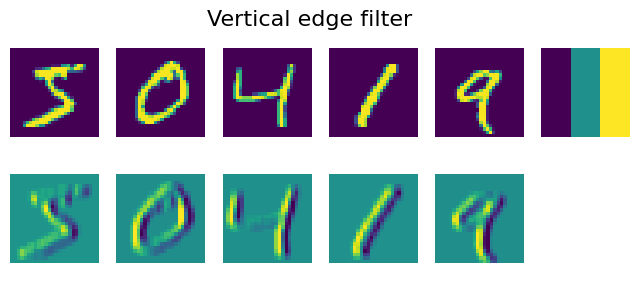

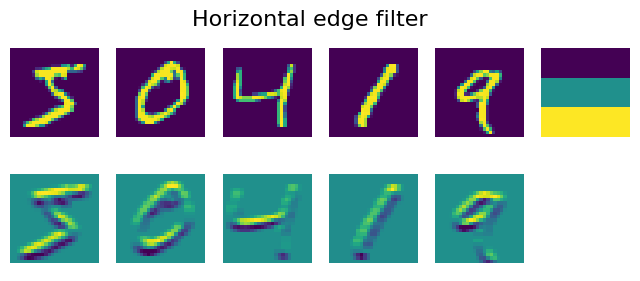

In [2]:
plot_convolution(torch.tensor([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]), data_train,'Vertical edge filter')
plot_convolution(torch.tensor([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]]), data_train,'Horizontal edge filter')

In [3]:
class OneConv(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(in_channels=1,out_channels=9,kernel_size=(5,5))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(5184,10)
    
    def forward(self,x):
        x = nn.functional.relu(self.conv(x))
        x = self.flatten(x)
        x = nn.functional.log_softmax(self.fc(x),dim=1)
        return x
net = OneConv()

summary(net,input_size=(1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
OneConv                                  [1, 10]                   --
├─Conv2d: 1-1                            [1, 9, 24, 24]            234
├─Flatten: 1-2                           [1, 5184]                 --
├─Linear: 1-3                            [1, 10]                   51,850
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.19
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.21
Estimated Total Size (MB): 0.25

Epoch  0, Train acc=0.946, Val acc=0.975, Train loss=0.001, Val loss=0.001
Epoch  1, Train acc=0.979, Val acc=0.980, Train loss=0.001, Val loss=0.001
Epoch  2, Train acc=0.985, Val acc=0.979, Train loss=0.000, Val loss=0.001
Epoch  3, Train acc=0.988, Val acc=0.976, Train loss=0.000, Val loss=0.001
Epoch  4, Train acc=0.989, Val acc=0.975, Train loss=0.000, Val loss=0.001


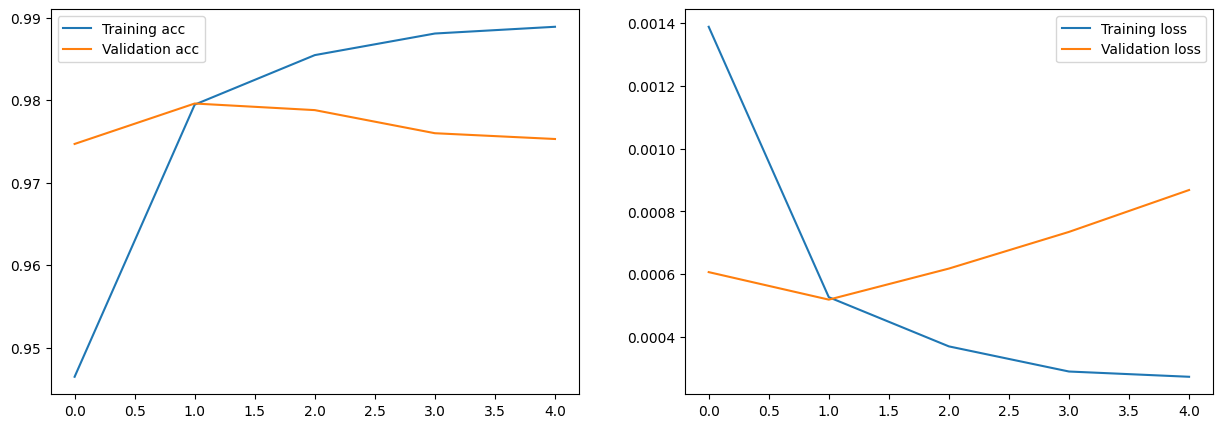

In [4]:
hist = train(net,train_loader,test_loader,epochs=5)
plot_results(hist)

Epoch  0, Train acc=0.989, Val acc=0.972, Train loss=0.000, Val loss=0.001
Epoch  1, Train acc=0.990, Val acc=0.974, Train loss=0.000, Val loss=0.001
Epoch  2, Train acc=0.991, Val acc=0.976, Train loss=0.000, Val loss=0.001
Epoch  3, Train acc=0.992, Val acc=0.978, Train loss=0.000, Val loss=0.001
Epoch  4, Train acc=0.993, Val acc=0.975, Train loss=0.000, Val loss=0.001


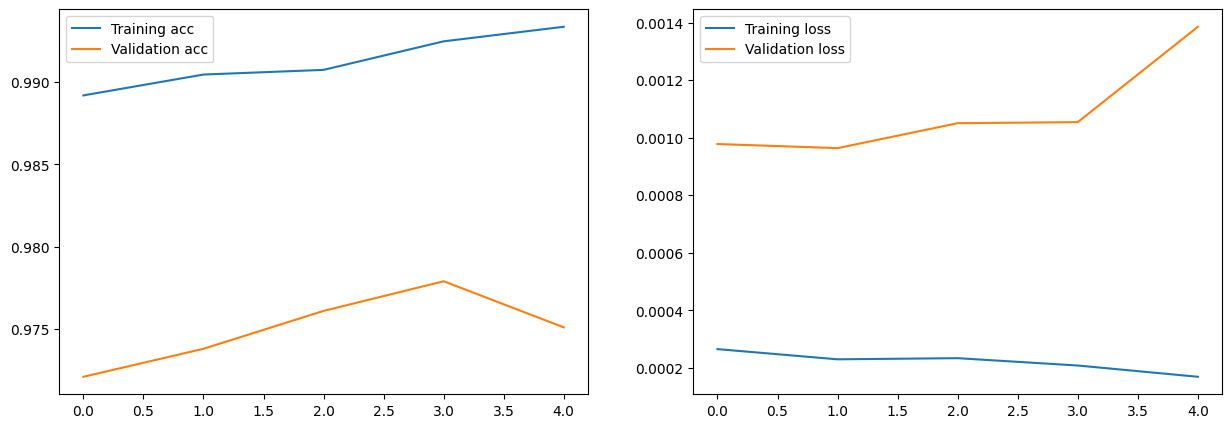

In [5]:
hist = train(net,train_loader,test_loader,epochs=5)
plot_results(hist)

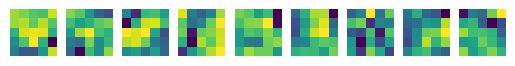

In [6]:
fig,ax = plt.subplots(1,9)
with torch.no_grad():
    p = next(net.conv.parameters())
    for i,x in enumerate(p):
        ax[i].imshow(x.detach().cpu()[0,...])
        ax[i].axis('off')

In [7]:
class MultiLayerCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc = nn.Linear(320,10)
    
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = nn.functional.log_softmax(self.fc(x),dim=1)
        return x

net = MultiLayerCNN()
summary(net,input_size=(1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
MultiLayerCNN                            [1, 10]                   --
├─Conv2d: 1-1                            [1, 10, 24, 24]           260
├─MaxPool2d: 1-2                         [1, 10, 12, 12]           --
├─Conv2d: 1-3                            [1, 20, 8, 8]             5,020
├─MaxPool2d: 1-4                         [1, 20, 4, 4]             --
├─Linear: 1-5                            [1, 10]                   3,210
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.47
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.03
Estimated Total Size (MB): 0.09

In [8]:
hist = train(net,train_loader,test_loader,epochs=5)

Epoch  0, Train acc=0.949, Val acc=0.981, Train loss=0.001, Val loss=0.000
Epoch  1, Train acc=0.982, Val acc=0.984, Train loss=0.000, Val loss=0.000
Epoch  2, Train acc=0.985, Val acc=0.983, Train loss=0.000, Val loss=0.000
Epoch  3, Train acc=0.986, Val acc=0.983, Train loss=0.000, Val loss=0.000
Epoch  4, Train acc=0.987, Val acc=0.980, Train loss=0.000, Val loss=0.001


In [9]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=14, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=14, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

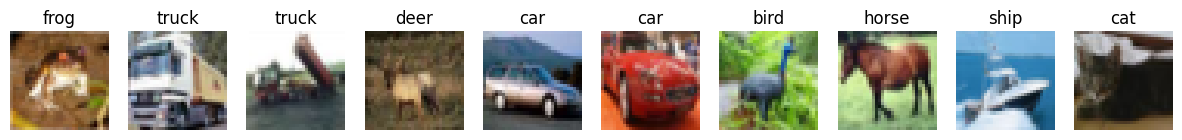

In [10]:

display_dataset(trainset,classes=classes)

In [11]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16,120,5)
        self.flat = nn.Flatten()
        self.fcl = nn.Linear(120,64)
        self.fc2 = nn.Linear(64,10)

    def forward(self,x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = nn.functional.relu(self.conv3(x))
        x = self.flat(x)
        x = nn.functional.relu(self.fcl(x))
        x = self.fc2(x)
        return x

net = LeNet()

summary(net, input_size=(1,3,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    [1, 10]                   --
├─Conv2d: 1-1                            [1, 6, 28, 28]            456
├─MaxPool2d: 1-2                         [1, 6, 14, 14]            --
├─Conv2d: 1-3                            [1, 16, 10, 10]           2,416
├─MaxPool2d: 1-4                         [1, 16, 5, 5]             --
├─Conv2d: 1-5                            [1, 120, 1, 1]            48,120
├─Flatten: 1-6                           [1, 120]                  --
├─Linear: 1-7                            [1, 64]                   7,744
├─Linear: 1-8                            [1, 10]                   650
Total params: 59,386
Trainable params: 59,386
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.66
Input size (MB): 0.01
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.30

In [ ]:
opt = torch.optim.SGD(net.parameters(), lr=0.001,momentum=0.9)
hist = train(net, trainloader, testloader, epochs=3, optimizer=opt, loss_fn=nn.CrossEntropyLoss())

Epoch  0, Train acc=0.263, Val acc=0.407, Train loss=0.142, Val loss=0.116
Epoch  1, Train acc=0.447, Val acc=0.481, Train loss=0.108, Val loss=0.103
